### Breast Cancer Classification con PyTorch

In [74]:
!pip install pandas==2.2.2
!pip install numpy==1.26.4
!pip install matplotlib==3.8.0
!pip install scikit-learn==1.5.0
!pip install torch==2.3.1
!pip install ucimlrepo==0.0.7


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Carga de datos

In [75]:
from ucimlrepo import fetch_ucirepo 
  
# Obtener el conjunto de datos 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# Datos (como dataframes de pandas) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

# Mostrar las primeras filas de los datos
display(X.head())

# Mostrar las primeras filas del objetivo
display(y.head())

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,Diagnosis
0,M
1,M
2,M
3,M
4,M


Esta celda descarga y prepara el conjunto de datos de cáncer de mama desde la UCI Machine Learning Repository.

In [76]:
display(f'X shape: {X.shape}')
display(f'y shape: {y.shape}')

'X shape: (569, 30)'

'y shape: (569, 1)'

In [77]:
display(y['Diagnosis'].value_counts())

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [78]:
import pandas as pd

# Combinar características y objetivo en un solo DataFrame para facilitar la manipulación
data = pd.concat([X, y], axis=1)

# Separar las dos clases
data_B = data[data['Diagnosis'] == 'B']
data_M = data[data['Diagnosis'] == 'M']

# Seleccionar 200 muestras de cada clase
data_B = data_B.sample(n=200, random_state=42)
data_M = data_M.sample(n=200, random_state=42)

# Combinar las dos clases
balanced_data = pd.concat([data_B, data_M])

# Mostrar el conteo de muestras por clase
display(balanced_data['Diagnosis'].value_counts())

Diagnosis
B    200
M    200
Name: count, dtype: int64

#### Procesamiento de datos

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# Separar características y objetivos
X = balanced_data.drop('Diagnosis', axis=1)
y = balanced_data['Diagnosis']

# Convertir los objetivos a etiquetas binarias
y = y.map({'B': 0, 'M': 1})

# Mostrar las características
display(X)

# Mostrar las etiquetas
display(y)


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
395,14.060,17.18,89.75,609.1,0.08045,0.05361,0.026810,0.03251,0.1641,0.05764,...,14.92,25.34,96.42,684.5,0.10660,0.12310,0.08460,0.07911,0.2523,0.06609
110,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.01778,0.1584,0.07065,...,11.05,21.47,71.68,367.0,0.14670,0.17650,0.13000,0.05334,0.2533,0.08468
481,13.900,19.24,88.73,602.9,0.07991,0.05326,0.029950,0.02070,0.1579,0.05594,...,16.41,26.42,104.40,830.5,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603
493,12.460,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
136,11.710,16.67,74.72,423.6,0.10510,0.06095,0.035920,0.02600,0.1339,0.05945,...,13.33,25.48,86.16,546.7,0.12710,0.10280,0.10460,0.06968,0.1712,0.07343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,15.320,17.27,103.20,713.3,0.13350,0.22840,0.244800,0.12420,0.2398,0.07596,...,17.73,22.66,119.80,928.8,0.17650,0.45030,0.44290,0.22290,0.3258,0.11910
328,16.270,20.71,106.90,813.7,0.11690,0.13190,0.147800,0.08488,0.1948,0.06277,...,19.28,30.38,129.80,1121.0,0.15900,0.29470,0.35970,0.15830,0.3103,0.08200
199,14.450,20.22,94.49,642.7,0.09872,0.12060,0.118000,0.05980,0.1950,0.06466,...,18.33,30.12,117.90,1044.0,0.15520,0.40560,0.49670,0.18380,0.4753,0.10130
194,14.860,23.21,100.40,671.4,0.10440,0.19800,0.169700,0.08878,0.1737,0.06672,...,16.08,27.78,118.60,784.7,0.13160,0.46480,0.45890,0.17270,0.3000,0.08701


395    0
110    0
481    0
493    0
136    0
      ..
257    1
328    1
199    1
194    1
223    1
Name: Diagnosis, Length: 400, dtype: int64

Estandarizamos los datos para que cada característica tenga media cero y varianza uno. Esto mejora la estabilidad del entrenamiento.

In [80]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

display(f'X_train shape: {X_train.shape}')
display(f'y_train shape: {y_train.shape}')
display(f'X_test shape: {X_test.shape}')
display(f'y_test shape: {y_test.shape}')

'X_train shape: (320, 30)'

'y_train shape: (320,)'

'X_test shape: (80, 30)'

'y_test shape: (80,)'

Dividimos los datos en entrenamiento y prueba, conservando la proporción original de clases con `stratify`.

In [81]:
from torch.utils.data import DataLoader, TensorDataset

# Estandarizar los datos
# Inicializar el StandardScaler
scaler = StandardScaler()
# Ajustar el escalador con los datos de entrenamiento y transformarlos
X_train = scaler.fit_transform(X_train)
# Transformar los datos de prueba usando el mismo escalador
X_test = scaler.transform(X_test)

# Convertir a tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Crear DataLoader para los conjuntos de entrenamiento y prueba
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

Estandarizamos los datos para que cada característica tenga media cero y varianza uno. Esto mejora la estabilidad del entrenamiento.

#### Modelo de la red neuronal

In [82]:
import torch.nn as nn

class ClassificationNet(nn.Module):
    def __init__(self, input_units=30, hidden_units=64, output_units=2):
        super(ClassificationNet, self).__init__()
        self.fc1 = nn.Linear(input_units, hidden_units)
        self.fc2 = nn.Linear(hidden_units, output_units)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Crear una instancia del modelo
model = ClassificationNet(input_units=30, hidden_units=64, output_units=2)

Aquí definimos la arquitectura de la red neuronal. La salida tiene 2 neuronas para clasificación binaria o 3 para multiclase.

In [83]:
print(model)

ClassificationNet(
  (fc1): Linear(in_features=30, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)


In [84]:
import torch.optim as optim

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Utilizamos la pérdida `CrossEntropyLoss`, adecuada para clasificación con múltiples clases mutuamente excluyentes.

In [85]:
epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Fase de entrenamiento
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Fase de prueba
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)
    
    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch [1/10], Train Loss: 0.2812, Test Loss: 0.1823
Epoch [2/10], Train Loss: 0.1203, Test Loss: 0.1348
Epoch [3/10], Train Loss: 0.0975, Test Loss: 0.1174
Epoch [4/10], Train Loss: 0.0860, Test Loss: 0.1085
Epoch [5/10], Train Loss: 0.0772, Test Loss: 0.1054
Epoch [6/10], Train Loss: 0.0691, Test Loss: 0.1003
Epoch [7/10], Train Loss: 0.0634, Test Loss: 0.1001
Epoch [8/10], Train Loss: 0.0590, Test Loss: 0.0997
Epoch [9/10], Train Loss: 0.0560, Test Loss: 0.0986
Epoch [10/10], Train Loss: 0.0511, Test Loss: 0.0964


Entrenamos el modelo durante varias épocas. En cada época se calcula la pérdida promedio tanto para entrenamiento como para prueba.

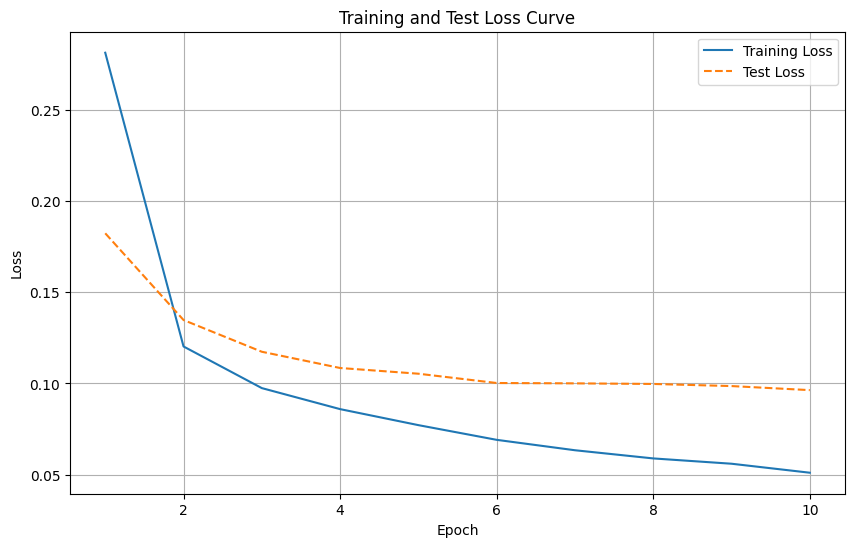

In [86]:
import matplotlib.pyplot as plt

# Gráfico de la curva de pérdida
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

Se grafican las curvas de pérdida para evaluar el aprendizaje del modelo a lo largo del tiempo.

In [87]:
from sklearn.metrics import accuracy_score, precision_score

# Evaluación: Accuracy y Precision
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        preds = torch.argmax(outputs, dim=1)
        y_true.extend(y_batch.numpy())
        y_pred.extend(preds.numpy())

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")


Accuracy: 0.9625
Precision: 0.9744


Finalmente, calculamos las métricas `Accuracy` y `Precision` para evaluar el rendimiento del modelo en el conjunto de prueba.

#### Diferente optimizador

##### Stochastic Gradient Descent (SGD)

Stochastic Gradient Descent (SGD) es un algoritmo de optimización ampliamente utilizado en aprendizaje automático y profundo para entrenar modelos. Es un método iterativo que optimiza una función de pérdida actualizando los parámetros del modelo en la dirección del gradiente negativo.

##### ¿Cómo funciona SGD?

SGD actualiza los parámetros del modelo de forma iterativa. La regla de actualización para cada parámetro $\theta$ es:

$$ \theta = \theta - \eta \cdot \nabla_\theta J(\theta) $$

donde:
- $\theta$ representa los parámetros del modelo.
- $\eta$ (eta) es la tasa de aprendizaje, que controla el tamaño del paso de cada actualización.
- $\nabla_\theta J(\theta)$ es el gradiente de la función de pérdida respecto al parámetro $\theta$.

##### `torch.optim.SGD` en PyTorch

PyTorch proporciona la clase `torch.optim.SGD` como una implementación eficiente del algoritmo SGD, incluyendo opciones para mejorar la convergencia y generalización.

##### Parámetros clave

1. **`params`**  
   - Parámetros del modelo a optimizar.  
   - Se pasan normalmente como `model.parameters()`.

2. **`lr` (learning rate)**  
   - Valor flotante positivo que determina el tamaño del paso en cada actualización.  
   - Ejemplo: `lr=0.01`.

3. **`momentum`** (opcional)  
   - Valor flotante que acelera el descenso en direcciones relevantes y suaviza las oscilaciones.  
   - Ejemplo: `momentum=0.9`.

4. **`weight_decay`** (opcional)  
   - Penalización L2 (regularización) que ayuda a prevenir el sobreajuste.  
   - Ejemplo: `weight_decay=0.0001`.

5. **`dampening`** (opcional)  
   - Valor flotante que reduce el efecto del momentum.  
   - Valor por defecto: `0`.


Epoch [1/10], Train Loss: 0.3714, Test Loss: 0.2643
Epoch [2/10], Train Loss: 0.1838, Test Loss: 0.2038
Epoch [3/10], Train Loss: 0.1375, Test Loss: 0.1683
Epoch [4/10], Train Loss: 0.1165, Test Loss: 0.1532
Epoch [5/10], Train Loss: 0.1041, Test Loss: 0.1416
Epoch [6/10], Train Loss: 0.0964, Test Loss: 0.1343
Epoch [7/10], Train Loss: 0.0900, Test Loss: 0.1291
Epoch [8/10], Train Loss: 0.0862, Test Loss: 0.1240
Epoch [9/10], Train Loss: 0.0823, Test Loss: 0.1209
Epoch [10/10], Train Loss: 0.0798, Test Loss: 0.1177


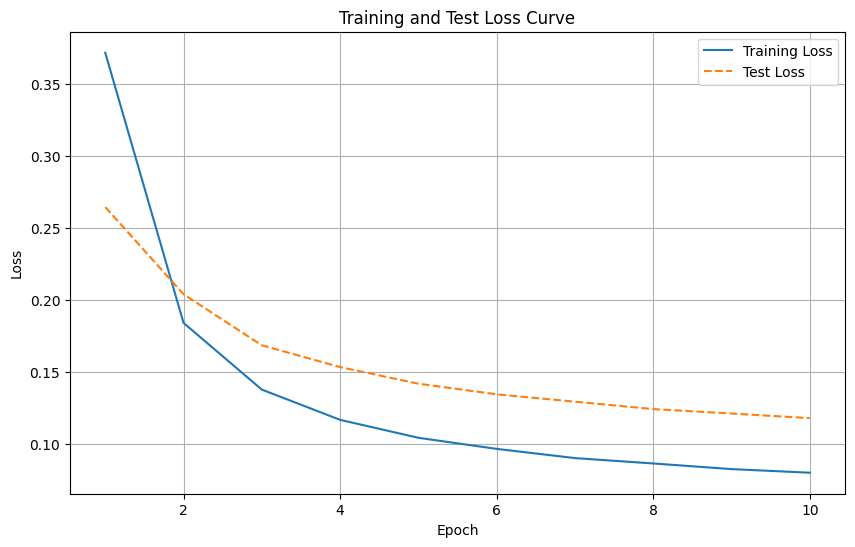

In [88]:
import torch.optim as optim

model_new_optimizer = ClassificationNet(input_units=30, hidden_units=64, output_units=2)

# Definir la función de pérdida y el optimizador nuevo
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_new_optimizer.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001)
epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    model_new_optimizer.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_new_optimizer(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    model_new_optimizer.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model_new_optimizer(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)
    
    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

import matplotlib.pyplot as plt

# Gráfico de la curva de pérdida con el nuevo optimizador
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

Utilizamos la pérdida `CrossEntropyLoss`, adecuada para clasificación con múltiples clases mutuamente excluyentes.

In [89]:
from sklearn.metrics import accuracy_score, precision_score

# Evaluación: Accuracy y Precision para el modelo con nuevo optimizador
model_new_optimizer.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model_new_optimizer(X_batch)
        preds = torch.argmax(outputs, dim=1)
        y_true.extend(y_batch.numpy())
        y_pred.extend(preds.numpy())

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)

print(f"[SGD] Accuracy: {accuracy:.4f}")
print(f"[SGD] Precision: {precision:.4f}")


[SGD] Accuracy: 0.9750
[SGD] Precision: 0.9750


Finalmente, calculamos las métricas `Accuracy` y `Precision` para evaluar el rendimiento del modelo en el conjunto de prueba.

#### Diferentes números de neuronas

Epoch [1/10], Train Loss: 0.4186, Test Loss: 0.2703
Epoch [2/10], Train Loss: 0.1775, Test Loss: 0.1890
Epoch [3/10], Train Loss: 0.1271, Test Loss: 0.1573
Epoch [4/10], Train Loss: 0.1038, Test Loss: 0.1377
Epoch [5/10], Train Loss: 0.0919, Test Loss: 0.1288
Epoch [6/10], Train Loss: 0.0839, Test Loss: 0.1217
Epoch [7/10], Train Loss: 0.0775, Test Loss: 0.1139
Epoch [8/10], Train Loss: 0.0738, Test Loss: 0.1095
Epoch [9/10], Train Loss: 0.0696, Test Loss: 0.1056
Epoch [10/10], Train Loss: 0.0677, Test Loss: 0.1031


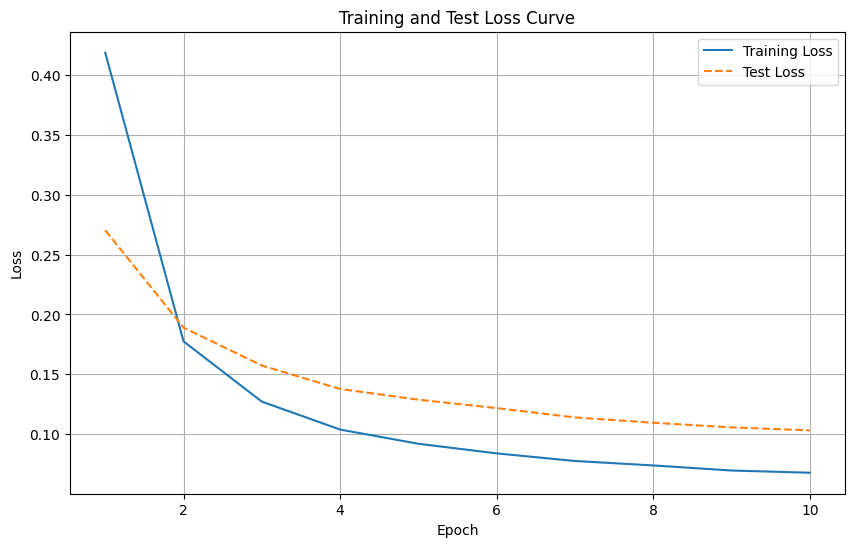

In [90]:
# Crear una nueva instancia del modelo con diferentes parámetros
model_new = ClassificationNet(input_units=30, hidden_units=16, output_units=2)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_new.parameters(), lr=0.001)

epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    model_new.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_new(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    model_new.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model_new(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)
    
    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

import matplotlib.pyplot as plt

# Gráfico de la curva de pérdida con el nuevo modelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

Utilizamos la pérdida `CrossEntropyLoss`, adecuada para clasificación con múltiples clases mutuamente excluyentes.

In [91]:
from sklearn.metrics import accuracy_score, precision_score

# Evaluación: Accuracy y Precision para el modelo con menos neuronas
model_new.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model_new(X_batch)
        preds = torch.argmax(outputs, dim=1)
        y_true.extend(y_batch.numpy())
        y_pred.extend(preds.numpy())

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)

print(f"[16 neuronas] Accuracy: {accuracy:.4f}")
print(f"[16 neuronas] Precision: {precision:.4f}")


[16 neuronas] Accuracy: 0.9625
[16 neuronas] Precision: 0.9744


Finalmente, calculamos las métricas `Accuracy` y `Precision` para evaluar el rendimiento del modelo en el conjunto de prueba.

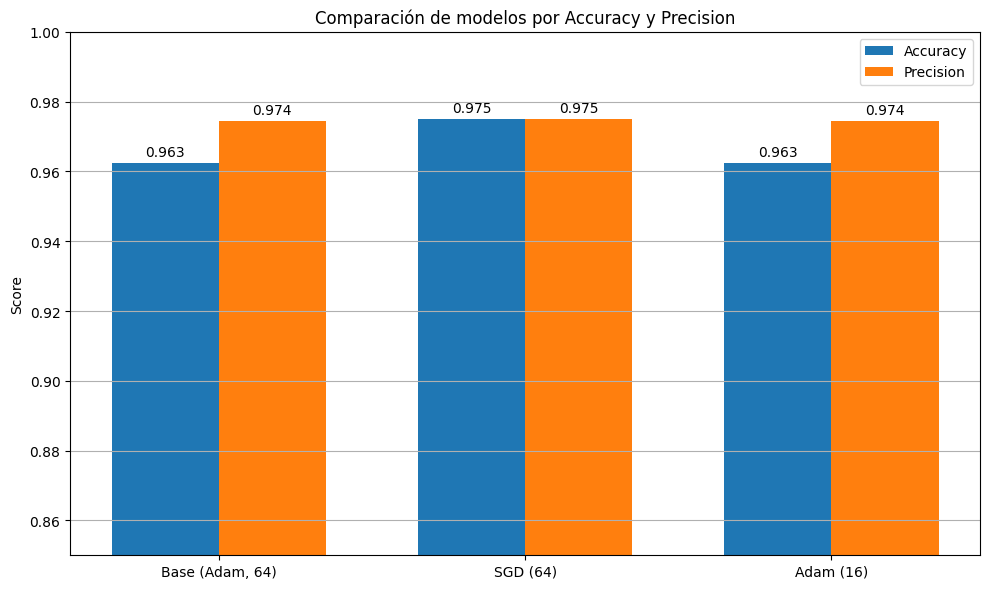

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Nombres de los modelos
model_names = ['Base (Adam, 64)', 'SGD (64)', 'Adam (16)']

# Métricas calculadas previamente
accuracies = [0.9625, 0.9750, 0.9625]   
precisions = [0.9744, 0.9750, 0.9744]  
x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, accuracies, width, label='Accuracy')
bars2 = ax.bar(x + width/2, precisions, width, label='Precision')

ax.set_ylabel('Score')
ax.set_title('Comparación de modelos por Accuracy y Precision')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()
ax.set_ylim(0.85, 1.00)
ax.grid(True, axis='y')

# Añadir valores encima de cada barra
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### Cambio de DataSet

In [93]:
from sklearn.datasets import load_iris

# Cargar el conjunto de datos Iris
iris = load_iris()

# Extraer las características y etiquetas
X_iris = iris.data
y_iris = iris.target

Epoch [1/10], Train Loss: 1.0403, Test Loss: 0.9854
Epoch [2/10], Train Loss: 0.9427, Test Loss: 0.8941
Epoch [3/10], Train Loss: 0.8455, Test Loss: 0.8097
Epoch [4/10], Train Loss: 0.7503, Test Loss: 0.7348
Epoch [5/10], Train Loss: 0.6798, Test Loss: 0.6678
Epoch [6/10], Train Loss: 0.6013, Test Loss: 0.6109
Epoch [7/10], Train Loss: 0.5468, Test Loss: 0.5618
Epoch [8/10], Train Loss: 0.4959, Test Loss: 0.5203
Epoch [9/10], Train Loss: 0.4595, Test Loss: 0.4876
Epoch [10/10], Train Loss: 0.4253, Test Loss: 0.4598


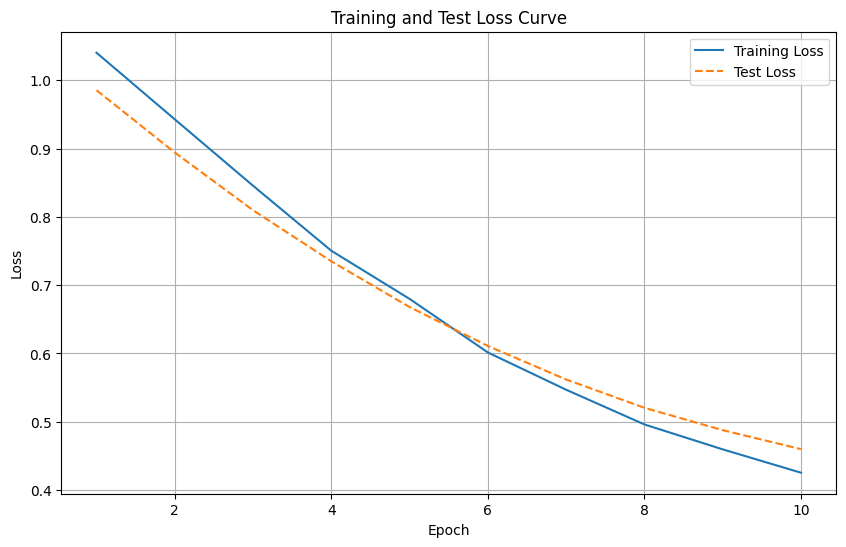

In [94]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Iris
iris = load_iris()

# Extraer las características y etiquetas
X_iris = iris.data
y_iris = iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris)

# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir a tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Crear DataLoader para los conjuntos de entrenamiento y prueba
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class IrisNet(nn.Module):
    def __init__(self, hidden_units=8):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, hidden_units)  
        self.fc2 = nn.Linear(hidden_units, 3)  

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = IrisNet(hidden_units=8)

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()
    
    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}')

# Gráfico de la curva de pérdida
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

Estandarizamos los datos para que cada característica tenga media cero y varianza uno. Esto mejora la estabilidad del entrenamiento.

In [95]:
from sklearn.metrics import accuracy_score, precision_score

# Evaluación del modelo Iris
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        preds = torch.argmax(outputs, dim=1)
        y_true.extend(y_batch.numpy())
        y_pred.extend(preds.numpy())

# Cálculo de métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')  # macro para multiclase

print(f"[IrisNet] Accuracy: {accuracy:.4f}")
print(f"[IrisNet] Precision (macro): {precision:.4f}")


[IrisNet] Accuracy: 0.7667
[IrisNet] Precision (macro): 0.8000


Finalmente, calculamos las métricas `Accuracy` y `Precision` para evaluar el rendimiento del modelo en el conjunto de prueba.